# Hacktiv8 PTP Introduction to Data Science Final Project :  Classification with Titanic Data

## Pengenalan

- Latar belakang memilih kasus : Lebih memahami Data Titanic dibanding data lainnya karena sebelumnya pernah mengikuti training Data Science dari Hackaton Kemenkeu dan data yang digunakan adalah data Titanic.

- Sumber data dari Kaggle dengan link: https://www.kaggle.com/c/titanic/data

- Objective: Mengetahui penumpang yang selamat berdasarkan variabel ticket class, sex(jenis kelamin), umur, spouses, orang tua/anak, nomor tiket, nomor kabin, tarif penumpang dan asal pelabuhan

## Import Pustaka

In [49]:
import pandas as pd
import numpy as np
import sklearn.datasets as datasets
import seaborn as sns
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import GridSearchCV, train_test_split

import sklearn.model_selection as model_selection
from sklearn.linear_model import LogisticRegression
from sklearn import svm
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import plot_confusion_matrix
import matplotlib.pyplot as plt
import pickle
import nltk

## Data Loading & Exploratory Data Analysis

### > Input Dataset

In [4]:
titanic = pd.read_csv ("train.csv")
titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [5]:
titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


### > Implementasi EDA & Visual Analysis

In [17]:
survived = titanic ['Survived'] == 1
titanic_survive = titanic [survived]
titanic_survive.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,342.000000,342.0,342.000000,290.000000,342.000000,342.000000,342.000000
mean,444.368421,1.0,1.950292,28.343690,0.473684,0.464912,48.395408
std,252.358840,0.0,0.863321,14.950952,0.708688,0.771712,66.596998
min,2.000000,1.0,1.000000,0.420000,0.000000,0.000000,0.000000
25%,250.750000,1.0,1.000000,19.000000,0.000000,0.000000,12.475000
50%,439.500000,1.0,2.000000,28.000000,0.000000,0.000000,26.000000
75%,651.500000,1.0,3.000000,36.000000,1.000000,1.000000,57.000000
max,890.000000,1.0,3.000000,80.000000,4.000000,5.000000,512.329200


## Insight

- Penumpang yang selamat pada train data sejumlah 342 orang dengan rata-rata umur 28 tahun
- Penumpang tertua yang selamat berumur 80 tahun dan penumpang termuda yang selamat berumur kurang dari 1 tahun
- Penumpang titanic yang selamat mostly tidak membawa pasangan atau kerabat dalam perjalanan ini

#### Mengetahui perbandingan jumlah penumpang yang selamat dan tidak selamat

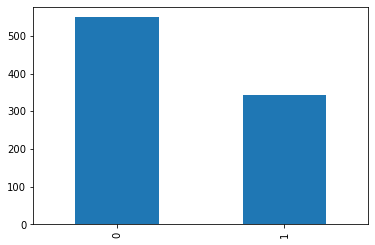

In [8]:
titanic_survivor = titanic ['Survived'].value_counts()
titanic_survivor. plot (kind = 'bar')
plt.show()

In [9]:
print('Result: Jumlah penumpang yang tidak selamat lebih banyak daripada penumpang yang selamat ')

Result: Jumlah penumpang yang tidak selamat lebih banyak daripada penumpang yang selamat 


#### Mengetahui perbandingan jumlah penumpang yang selamat dan tidak selamat berdasarkan pelabuhan keberangkatan

<AxesSubplot:>

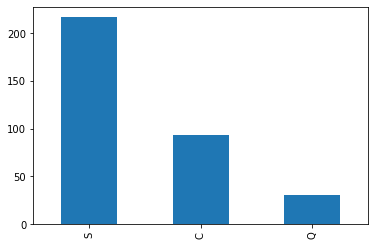

In [21]:
titanic_survivor_embarked = titanic_survive ['Embarked'].value_counts()
titanic_survivor_embarked.plot(kind='bar')

In [25]:
print('Result: Jumlah penumpang selamat tertinggi berasal dari pelabuhan keberangkatan Southhampton dan penumpang selamat terendah berangkat dari pelabuhan Queenstown')

Result: Jumlah penumpang selamat tertinggi berasal dari pelabuhan keberangkatan Southhampton dan penumpang selamat terendah berangkat dari pelabuhan Queenstown


#### Mengetahui perbandingan jumlah penumpang yang selamat dan tidak selamat berdasarkan jenis kelamin

<AxesSubplot:>

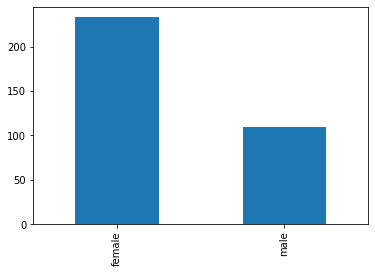

In [19]:
titanic_survivor_sex = titanic_survive ['Sex'].value_counts()
titanic_survivor_sex.plot (kind = 'bar')

In [26]:
print('Result: Penumpang selamat didominasi oleh perempuan')

Result: Penumpang selamat didominasi oleh perempuan


## Data Prepocessing

#### >> Redefine gender dari string menjadi integer

In [27]:
sex_redef = {'female':1
             ,'male':2}
titanic ['Sex'].replace (sex_redef, inplace = True)

In [28]:
titanic

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",2,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",1,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",2,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",2,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",1,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",1,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",2,26.0,0,0,111369,30.0000,C148,C


In [39]:
new_col = ['Sex','Fare','Parch', 'Pclass']
titanic[new_col]

,Sex,Fare,Parch,Pclass
0,2,7.2500,0,3
1,1,71.2833,0,1
2,1,7.9250,0,3
3,1,53.1000,0,1
4,2,8.0500,0,3
...,...,...,...,...
886,2,13.0000,0,2
887,1,30.0000,0,1
888,1,23.4500,2,3
889,2,30.0000,0,1


In [40]:
x = titanic [new_col].to_numpy()
y = titanic ['Survived'].to_numpy()
x_train, x_test, y_train, y_test = model_selection.train_test_split (x,y,train_size = 0.8, random_state = 0)

In [41]:
titanic

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",2,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",1,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",2,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",2,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",1,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",1,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",2,26.0,0,0,111369,30.0000,C148,C


## Pendefinisian Model

#### >> Logistic Regression: Karena dapat mengklasifikasikan kelompok dengan baik dan mampu menangani outlier data

In [45]:
log_reg = LogisticRegression()
log_reg.fit (x_train, y_train)
print('Model Score:',log_reg.score(x_train,y_train))

Model Score: 0.7935393258426966


In [46]:
pip install scikit-learn

Note: you may need to restart the kernel to use updated packages.


In [47]:
conda update scikit-learn

Solving environment: ...working... 

Updating scikit-learn is constricted by 

anaconda -> requires scikit-learn==0.24.1=py38hf11a4ad_0

If you are sure you want an update of your package either try `conda update --all` or install a specific version of the package you want using `conda install <pkg>=<version>`

done

## Package Plan ##

  environment location: C:\Users\winny\Anaconda3

Note: you may need to restart the kernel to use updated packages.

  added / updated specs:
    - scikit-learn


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    conda-4.11.0               |   py38haa95532_0        14.4 MB
    xmltodict-0.12.0           |     pyhd3eb1b0_0          13 KB
    ------------------------------------------------------------
                                           Total:        14.5 MB

The following packages will be UPDATED:

  conda                               4.10.3-py38haa

In [52]:
print('The nltk version is{}.'.format(nltk.__version__))

The nltk version is3.6.1.
